# <i><b>IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/credit_card_approval.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


#<b><i>UNDERSTANDING THE DATASET

In [4]:
# no of columns and no of rows

df.shape

(537667, 19)

In [5]:
# checking the data type , for null values etc

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

In [6]:
# just for confirmation

df.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64

In [7]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Print the list of numerical columns

numerical_columns

['ID',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'BEGIN_MONTHS',
 'TARGET']

In [8]:
# Select all object columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of object columns

object_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'JOB',
 'STATUS']

#<b><i>ENCODING ON OBJECT(aka NON NUMERIC) COLUMNS</b><br>

    'CODE_GENDER'    : Gender of applicant
    'FLAG_OWN_CAR'   : Does applicant owns a car
    'FLAG_OWN_REALTY': Does applicant owns a property
    'CNT_CHILDREN'   : No of childeren for applicants
    'NAME_EDUCATION_TYPE' : Education level
    'NAME_FAMILY_STATUS' : Marital Status of Applicant
    'NAME_HOUSING_TYPE' : Way of Living of Appliant
    'JOB' : Job of applicant
    'STATUS' :

In [9]:
df[object_columns].head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,JOB,STATUS
0,F,Y,N,2+ children,Secondary / secondary special,Married,With parents,Managers,C
1,F,N,N,No children,Secondary / secondary special,Single / not married,House / apartment,Private service staff,0
2,M,Y,Y,No children,Higher education,Married,House / apartment,Laborers,C
3,F,Y,Y,1 children,Secondary / secondary special,Married,House / apartment,Core staff,0
4,M,Y,Y,2+ children,Secondary / secondary special,Married,House / apartment,Drivers,0


In [10]:
object_columns

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'JOB',
 'STATUS']

# <ul><i>'CODE_GENDER'

In [11]:
df["CODE_GENDER"].value_counts()/df.shape[0]

F    0.62089
M    0.37911
Name: CODE_GENDER, dtype: float64

<ipython-input-12-79ed4577d131>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CODE_GENDER', data=df, palette='pastel')


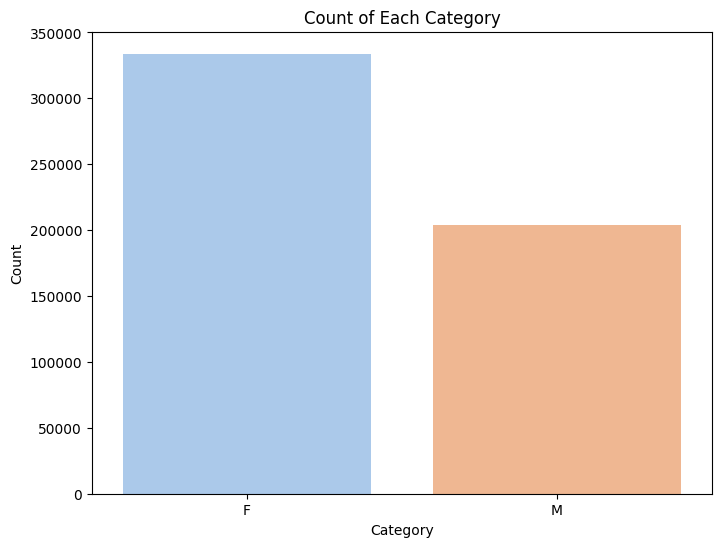

In [12]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='CODE_GENDER', data=df, palette='pastel')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category')

plt.show()


In [13]:
# Perform one-hot encoding

df= pd.get_dummies(df, columns=["CODE_GENDER"])
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,CODE_GENDER_F,CODE_GENDER_M
0,5065438,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,1,0
1,5142753,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,1,0
2,5111146,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,0,1
3,5010310,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,1,0
4,5010835,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,0,1


In [14]:
# Dropping Female column

df=df.drop('CODE_GENDER_F', axis=1)

# Renamed to is male

df = df.rename(columns={'CODE_GENDER_M': 'IS_MALE'})
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,IS_MALE
0,5065438,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0
1,5142753,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0
2,5111146,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,1
3,5010310,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0
4,5010835,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,5142999,Y,N,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,1,0,1,0,Core staff,-8,0,0,1
537663,5010773,N,Y,No children,135000.0,Higher education,Married,With parents,-14160,-4635,1,0,0,0,Sales staff,-8,0,0,0
537664,5105601,N,Y,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,1,0,0,0,Private service staff,-7,0,0,1
537665,5132833,Y,N,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,1,0,1,0,Laborers,-1,0,0,1


#<ul><i>'FLAG_OWN_CAR'

In [15]:
df["FLAG_OWN_CAR"].value_counts()/df.shape[0]

N    0.56951
Y    0.43049
Name: FLAG_OWN_CAR, dtype: float64

<ipython-input-16-98941ddb47f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="FLAG_OWN_CAR", data=df, palette='pastel')


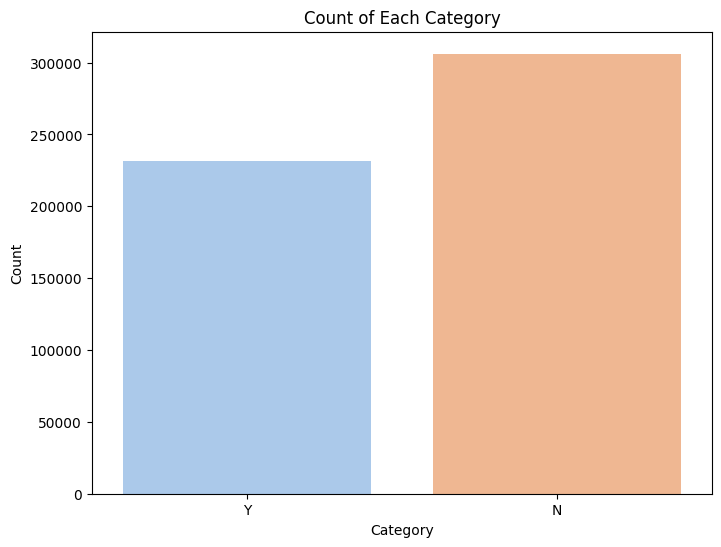

In [16]:
# Count plot

plt.figure(figsize=(8, 6))
sns.countplot(x="FLAG_OWN_CAR", data=df, palette='pastel')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category')

plt.show()


In [17]:
# Perform one-hot encoding

df= pd.get_dummies(df, columns=["FLAG_OWN_CAR"])
df.head()

,ID,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,IS_MALE,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y
0,5065438,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0,0,1
1,5142753,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0,1,0
2,5111146,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,1,0,1
3,5010310,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0,0,1
4,5010835,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,1,0,1


In [18]:
# Dropping Female column

df=df.drop('FLAG_OWN_CAR_N', axis=1)

# Renamed to is male

df = df.rename(columns={'FLAG_OWN_CAR_Y': 'OWNS_CAR'})
df.head()

,ID,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,IS_MALE,OWNS_CAR
0,5065438,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0,1
1,5142753,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0,0
2,5111146,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,1,1
3,5010310,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0,1
4,5010835,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,1,1


#<i><ul>'FLAG_OWN_REALTY'

In [19]:
df["FLAG_OWN_REALTY"].value_counts()/df.shape[0]

Y    0.642537
N    0.357463
Name: FLAG_OWN_REALTY, dtype: float64

<ipython-input-20-8b49ff13e4e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FLAG_OWN_REALTY', data=df, palette='pastel')


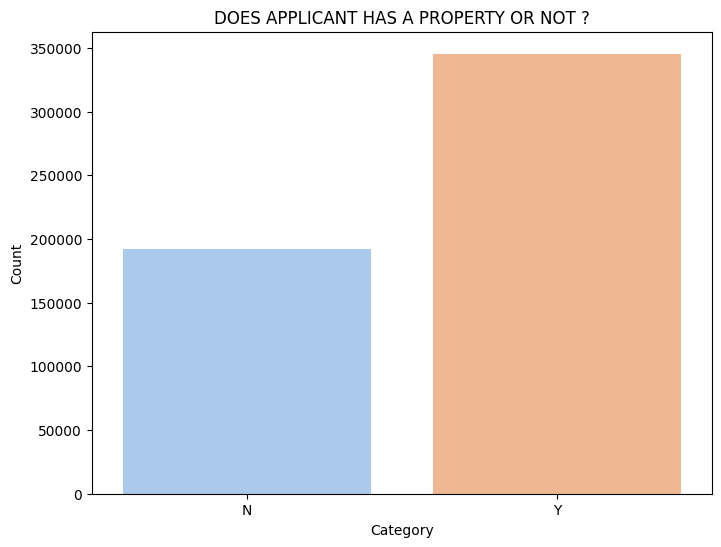

In [20]:
# Count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='FLAG_OWN_REALTY', data=df, palette='pastel')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('DOES APPLICANT HAS A PROPERTY OR NOT ?')

plt.show()

In [21]:
# Perform one-hot encoding

df= pd.get_dummies(df, columns=["FLAG_OWN_REALTY"])
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,IS_MALE,OWNS_CAR,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,5065438,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0,1,1,0
1,5142753,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0,0,1,0
2,5111146,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,1,1,0,1
3,5010310,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0,1,0,1
4,5010835,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,1,1,0,1


In [22]:
# Dropping FLAG_OWN_REALTY_N

df=df.drop('FLAG_OWN_REALTY_N', axis=1)

# Renamed to ownproperty

df = df.rename(columns={'FLAG_OWN_REALTY_Y': 'OWNS_PROPERTY'})
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY
0,5065438,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0,1,0
1,5142753,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0,0,0
2,5111146,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,1,1,1
3,5010310,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0,1,1
4,5010835,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,1,1,1


#<i><ul>'CNT_CHILDREN'</ul>


    'No children': 0
    '1 children': 1
    '2+ children': 2

In [23]:
df.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET,IS_MALE,OWNS_CAR,OWNS_PROPERTY
0,5065438,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0,0,1,0
1,5142753,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0,0,0,0
2,5111146,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0,1,1,1
3,5010310,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0,0,1,1
4,5010835,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0,1,1,1


In [24]:

df['CNT_CHILDREN'].value_counts()/df.shape[0]

No children    0.638222
1 children     0.237498
2+ children    0.124280
Name: CNT_CHILDREN, dtype: float64

<ipython-input-25-ed78f1f25e9e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CNT_CHILDREN', data=df, order=category_counts['CNT_CHILDREN'], palette='pastel')


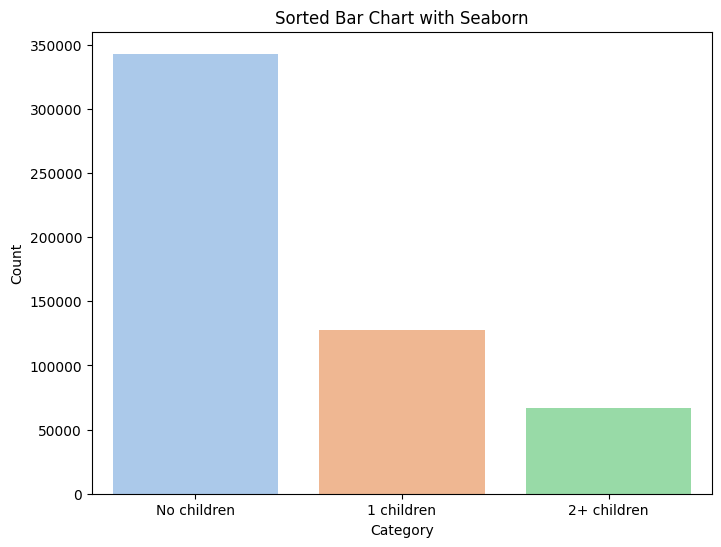

In [25]:

# Calculate counts for each category
category_counts = df['CNT_CHILDREN'].value_counts().reset_index()

# Rename the columns for clarity
category_counts.columns = ['CNT_CHILDREN', 'Count']
# Sort the DataFrame by count in descending order
category_counts = category_counts.sort_values(by='Count', ascending=False)
# Create a sorted bar chart with seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='CNT_CHILDREN', data=df, order=category_counts['CNT_CHILDREN'], palette='pastel')

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Sorted Bar Chart with Seaborn')

plt.show()


In [26]:
# Define the ordinal mapping (without sorting)
ordinal_mapping = {'No children': 0, '1 children': 1, '2+ children': 2}

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[list(ordinal_mapping.keys())])
df['CNT_CHILDREN'] = encoder.fit_transform(df[['CNT_CHILDREN']])

#<i><ul>'NAME_EDUCATION_TYPE'</ul>


    'Secondary / secondary special': 0
    'Higher education': 1
    'Incomplete higher': 2
    "Lower secondary":3
    "Academic degree":4

In [27]:
df['NAME_EDUCATION_TYPE'].value_counts()/df.shape[0]

Secondary / secondary special    0.666429
Higher education                 0.285995
Incomplete higher                0.038295
Lower secondary                  0.008474
Academic degree                  0.000807
Name: NAME_EDUCATION_TYPE, dtype: float64

<ipython-input-28-7245eb798dc8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='NAME_EDUCATION_TYPE', data=category_counts, palette='pastel')


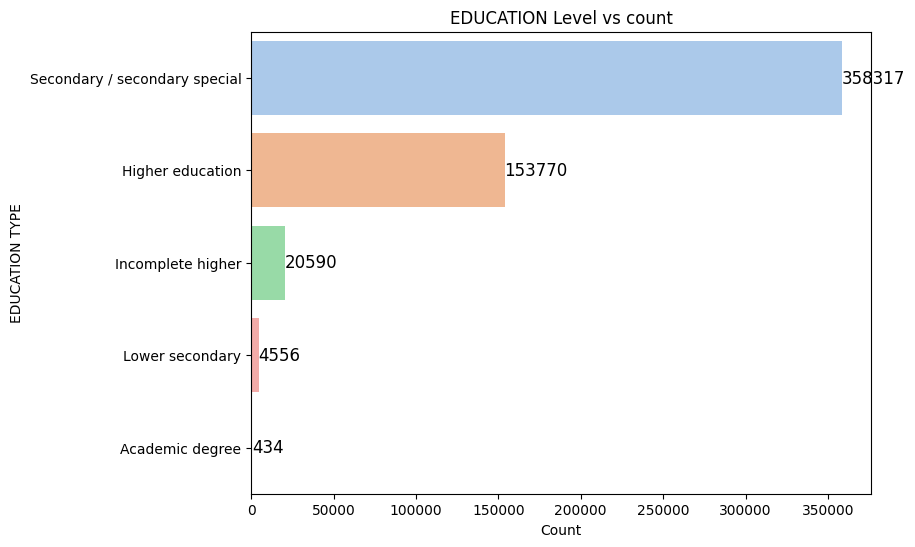

In [28]:

# Calculate counts for each category
category_counts = df['NAME_EDUCATION_TYPE'].value_counts().reset_index()

# Rename the columns for clarity
category_counts.columns = ['NAME_EDUCATION_TYPE', 'Count']

# Sort the DataFrame by count in descending order
category_counts = category_counts.sort_values(by='Count', ascending=False)

# Create a horizontal sorted bar chart with seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='NAME_EDUCATION_TYPE', data=category_counts, palette='pastel')

# Adding count values inside the bars
for index, value in enumerate(category_counts['Count']):
    ax.text(value, index, str(value), va='center', fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('EDUCATION TYPE')
plt.title('EDUCATION Level vs count')

plt.show()



In [29]:
# Define the ordinal mapping (without sorting)
ordinal_mapping = {'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2,"Lower secondary":3,"Academic degree":4}

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[list(ordinal_mapping.keys())])
df['NAME_EDUCATION_TYPE'] = encoder.fit_transform(df[['NAME_EDUCATION_TYPE']])

#<i><ul>'NAME_FAMILY_STATUS'</ul>


    'Married': 0
    'Single / not married': 1
    'Civil marriage': 2
    "Separated":3
    "Widow":4


In [30]:
df['NAME_FAMILY_STATUS'].value_counts()/df.shape[0]

Married                 0.714202
Single / not married    0.122648
Civil marriage          0.081989
Separated               0.058389
Widow                   0.022771
Name: NAME_FAMILY_STATUS, dtype: float64

<ipython-input-31-51533be8b3bd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='NAME_FAMILY_STATUS', data=category_counts, palette='pastel')


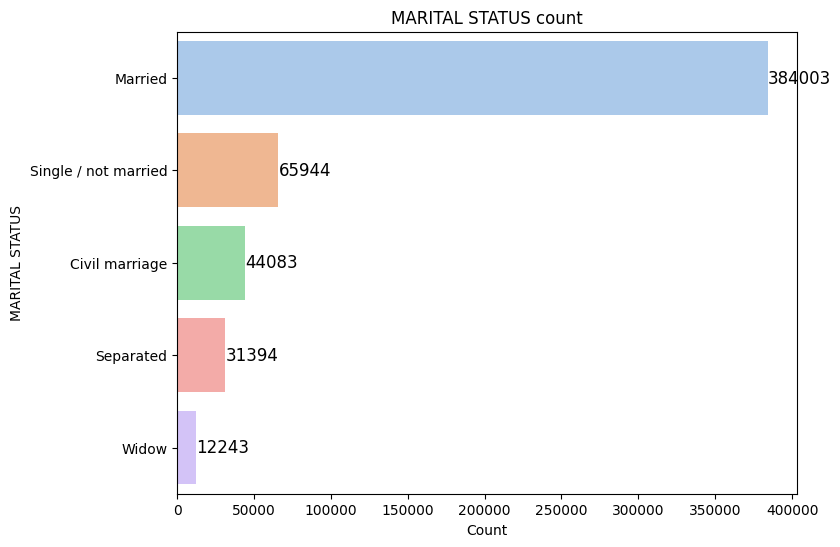

In [31]:
# Calculate counts for each category
category_counts = df['NAME_FAMILY_STATUS'].value_counts().reset_index()

# Rename the columns for clarity
category_counts.columns = ['NAME_FAMILY_STATUS', 'Count']

# Sort the DataFrame by count in descending order
category_counts = category_counts.sort_values(by='Count', ascending=False)

# Create a horizontal sorted bar chart with seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='NAME_FAMILY_STATUS', data=category_counts, palette='pastel')

# Adding count values inside the bars
for index, value in enumerate(category_counts['Count']):
    ax.text(value, index, str(value), va='center', fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('MARITAL STATUS')
plt.title('MARITAL STATUS count')

plt.show()

In [32]:
# Define the ordinal mapping (without sorting)
ordinal_mapping = {'Married': 0, 'Single / not married': 1, 'Civil marriage': 2,"Separated":3,"Widow":4}

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[list(ordinal_mapping.keys())])
df['NAME_FAMILY_STATUS'] = encoder.fit_transform(df[['NAME_FAMILY_STATUS']])

In [33]:
df = df.rename(columns={'NAME_FAMILY_STATUS': "MARITAL_STATUS"})

#<ul><i>'NAME_HOUSING_TYPE'

    'House / apartment': 0
    'With parents': 1
    'Municipal apartment': 2
    "Rented apartment":3
    "Office apartment":4
    "Co-op apartment":5

In [34]:
df['NAME_HOUSING_TYPE'].value_counts()/df.shape[0]

House / apartment      0.881916
With parents           0.054590
Municipal apartment    0.033521
Rented apartment       0.015922
Office apartment       0.007735
Co-op apartment        0.006316
Name: NAME_HOUSING_TYPE, dtype: float64

<ipython-input-35-b07f19905959>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='NAME_HOUSING_TYPE', data=category_counts, palette='pastel')


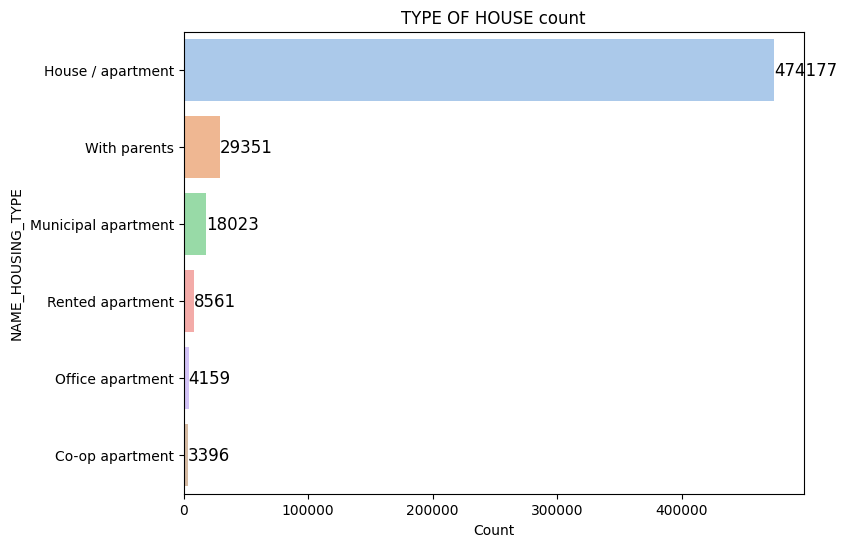

In [35]:
# Calculate counts for each category
category_counts = df['NAME_HOUSING_TYPE'].value_counts().reset_index()

# Rename the columns for clarity
category_counts.columns = ['NAME_HOUSING_TYPE', 'Count']

# Sort the DataFrame by count in descending order
category_counts = category_counts.sort_values(by='Count', ascending=False)

# Create a horizontal sorted bar chart with seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='NAME_HOUSING_TYPE', data=category_counts, palette='pastel')

# Adding count values inside the bars
for index, value in enumerate(category_counts['Count']):
    ax.text(value, index, str(value), va='center', fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('NAME_HOUSING_TYPE')
plt.title('TYPE OF HOUSE count')

plt.show()

In [36]:
# Define the ordinal mapping (without sorting)
ordinal_mapping = {'House / apartment': 0, 'With parents': 1, 'Municipal apartment': 2,"Rented apartment":3,"Office apartment":4,"Co-op apartment":5}

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[list(ordinal_mapping.keys())])
df['NAME_HOUSING_TYPE'] = encoder.fit_transform(df[['NAME_HOUSING_TYPE']])
df=df.rename(columns={'NAME_HOUSING_TYPE':"HOUSE_TYPE"})

#<i><ul>'JOB'</ul>

In [37]:
df['JOB'].value_counts()/df.shape[0]

Laborers                 0.244709
Core staff               0.143420
Sales staff              0.130865
Managers                 0.125985
Drivers                  0.088676
High skill tech staff    0.059085
Accountants              0.050632
Medicine staff           0.049642
Cooking staff            0.024952
Security staff           0.023063
Cleaning staff           0.021201
Private service staff    0.012487
Low-skill Laborers       0.006738
Secretaries              0.005857
Waiters/barmen staff     0.004756
HR staff                 0.003136
IT staff                 0.002453
Realty agents            0.002343
Name: JOB, dtype: float64

<ipython-input-38-1b12d5a75ac3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='JOB', data=category_counts, palette='pastel')


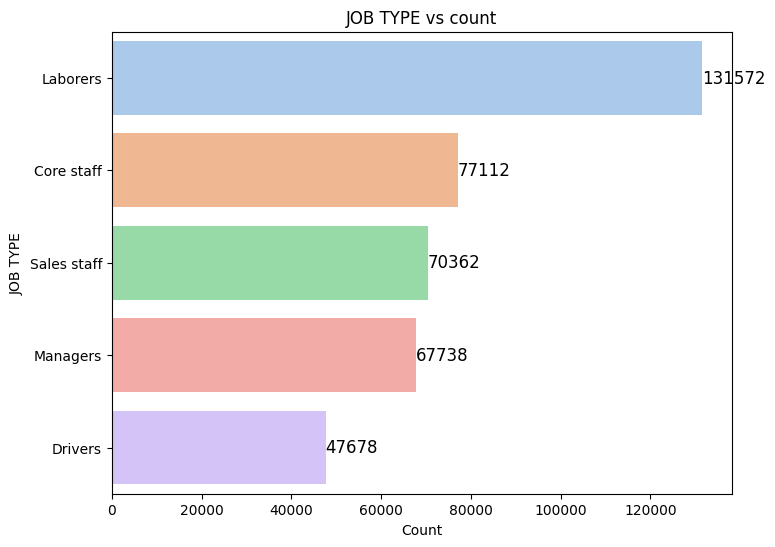

In [38]:
# Calculate counts for each category
category_counts = df['JOB'].value_counts().reset_index()

# Rename the columns for clarity
category_counts.columns = ['JOB', 'Count']

# Sort the DataFrame by count in descending order
category_counts = category_counts.sort_values(by='Count', ascending=False).head(5)

# Create a horizontal sorted bar chart with seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='JOB', data=category_counts, palette='pastel')

# Adding count values inside the bars
for index, value in enumerate(category_counts['Count']):
    ax.text(value, index, str(value), va='center', fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('JOB TYPE')
plt.title('JOB TYPE vs count')

plt.show()

In [39]:
label_encoder = LabelEncoder()
df['JOB'] = label_encoder.fit_transform(df['JOB'])
df=df.rename(columns={"JOB":"JOB CATEGORY"})

#<ul><i>STATUS</b><br>
          0: 1-29 days past due<br>
          1: 30-59 days past due<br>
          2: 60-89 days overdue<br>
          3: 90-119 days overdue<br>
          4: 120-149 days overdue<br>
          5: Overdue or bad debts, write-offs for more than 150 days<br>
          C: Paid off that month<br>
          X: No loan for the month<br>

In [40]:
df['STATUS'].value_counts()/df.shape[0]

C    0.420679
0    0.373707
X    0.190019
1    0.011946
5    0.002022
2    0.001008
3    0.000337
4    0.000283
Name: STATUS, dtype: float64

<ipython-input-41-04f9a9531a79>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='STATUS', data=category_counts, palette='pastel')


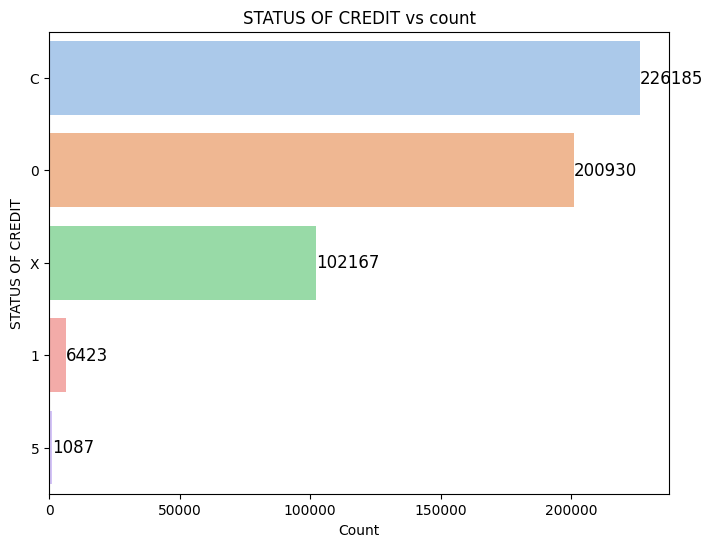

In [41]:
category_counts = df['STATUS'].value_counts().reset_index()

# Rename the columns for clarity
category_counts.columns = ['STATUS', 'Count']

# Sort the DataFrame by count in descending order
category_counts = category_counts.sort_values(by='Count', ascending=False).head(5)

# Create a horizontal sorted bar chart with seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Count', y='STATUS', data=category_counts, palette='pastel')

# Adding count values inside the bars
for index, value in enumerate(category_counts['Count']):
    ax.text(value, index, str(value), va='center', fontsize=12, color='black')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('STATUS OF CREDIT')
plt.title('STATUS OF CREDIT vs count')

plt.show()

In [42]:
# Define the ordinal mapping (without sorting)
ordinal_mapping = {"0":0,"1":1,'2':2,'3':3,'4':4,'5':5,'C': 6, 'X': 7}

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[list(ordinal_mapping.keys())])
df['STATUS'] = encoder.fit_transform(df[['STATUS']])
df=df.rename(columns={'STATUS':"STATUS OF LOAN"})

In [43]:
df.select_dtypes(include="object")

""
0
1
2
3
4
...
537662
537663
537664
537665


In [48]:
import pandas as pd

# Assuming df is your DataFrame
df.to_csv('/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/encoded_dataset.csv', index=False)


#<b><i>HANDLING OUTLIERS IN NUMERICAL COLUMNS